<a href="https://colab.research.google.com/github/Betinsss/CSST102-3A/blob/main/3A-LAT-MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('datasets_house_prices.csv')

Data Exploration and Visualization:

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

<ipython-input-4-b7bc65970a10>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='yellow')


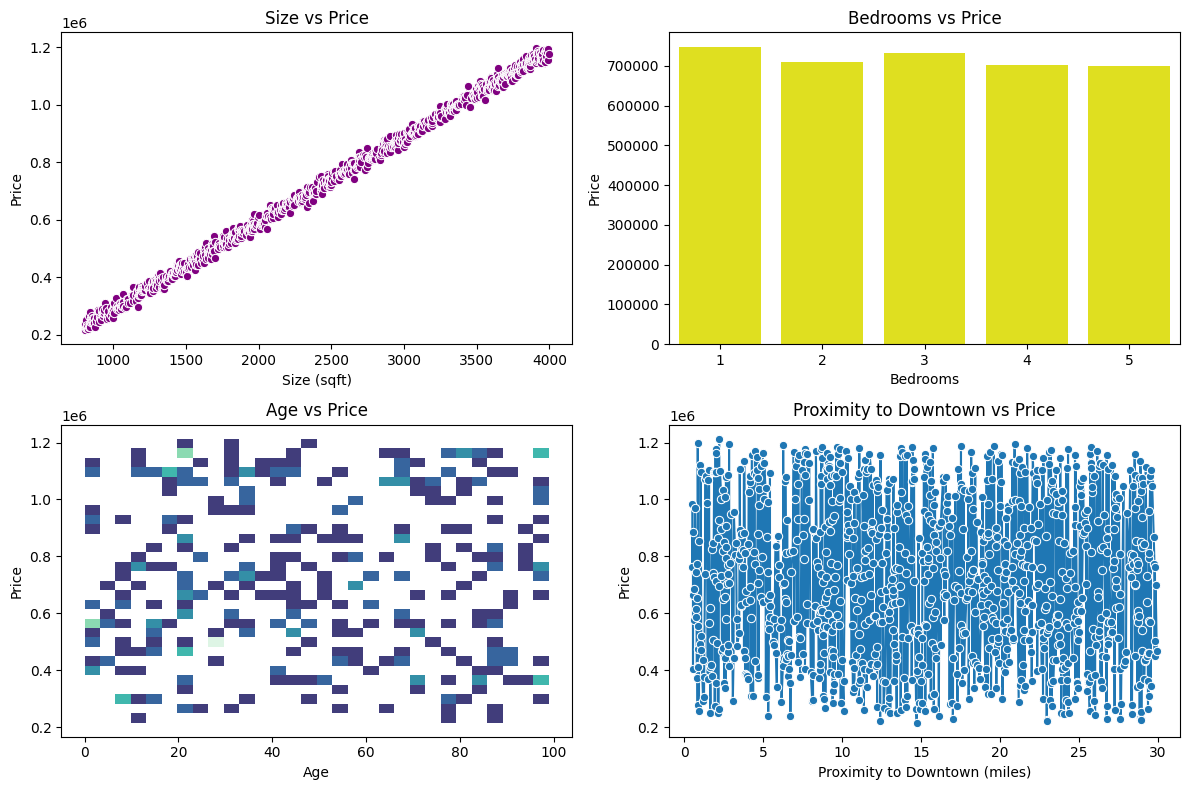

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Line plot for Size vs Price
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Size (sqft)', y='Price', marker='o', color='purple')
plt.title('Size vs Price')

# Bar plot for Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Bedrooms', y='Price', ci=None, color='yellow')
plt.title('Bedrooms vs Price')

# Histogram for Age vs Price
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', y='Price', bins=30, pthresh=.05, cmap="mako")
plt.title('Age vs Price')

# Line plot for Proximity to Downtown vs Price
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Proximity to Downtown (miles)', y='Price', marker='o')
plt.title('Proximity to Downtown vs Price')

plt.tight_layout()
plt.show()

<ipython-input-5-e4cda4fbab0b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


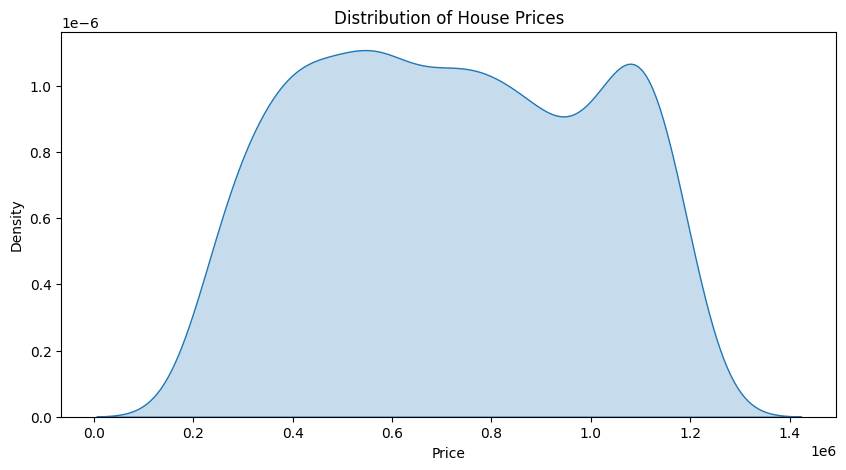

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'], shade=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

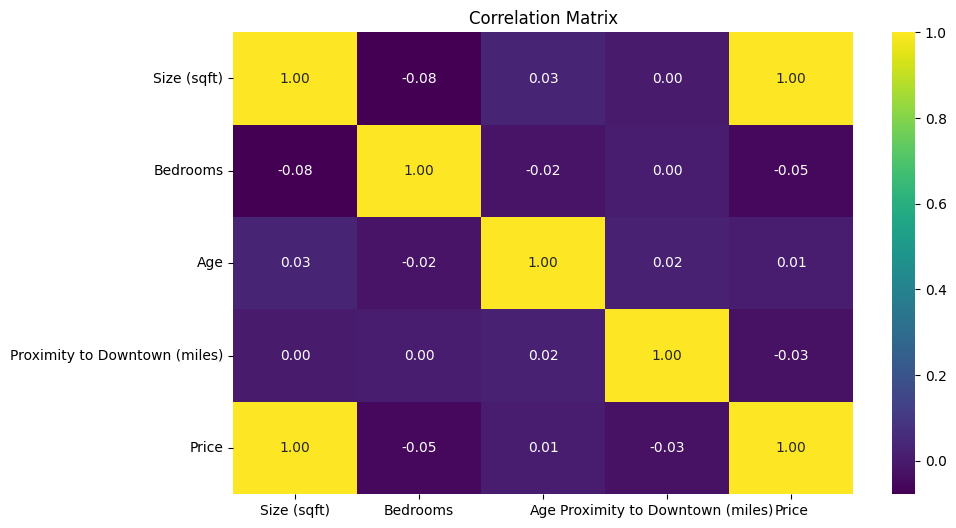

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix')
plt.show()



Data Processing

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df.columns)

Index(['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)',
       'Price'],
      dtype='object')


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']])
y = df['Price']

In [ ]:
df.columns = df.columns.str.replace(' ', '')

Model Development:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, ['Size (sq. ft.)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], columns=['Coefficient'])
print(coefficients)

                                 Coefficient
Size (sq. ft.)                 278975.285938
Bedrooms                         6804.519001
Age                             -6082.939258
Proximity to Downtown (miles)   -8459.853956


Model Evaluation:

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 100214724.63
R-squared: 1.00


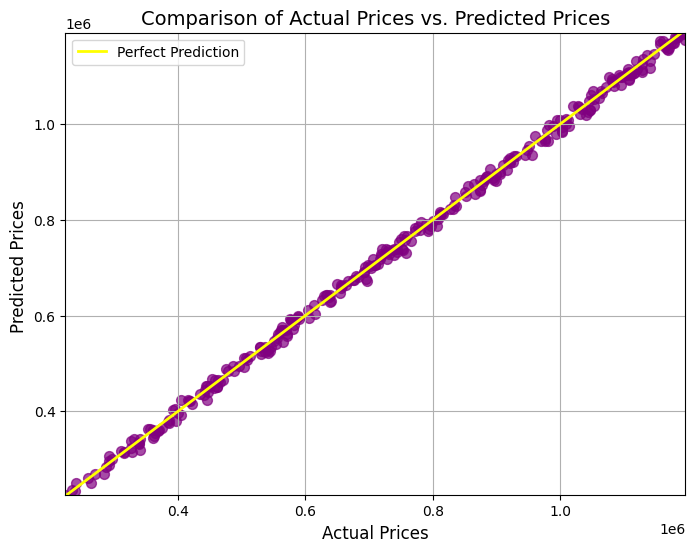

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='o', s=50, alpha=0.7, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linewidth=2, label='Perfect Prediction')
plt.xlim(min(y_test) - 10, max(y_test) + 10)
plt.ylim(min(y_pred) - 10, max(y_pred) + 10)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices ', fontsize=12)
plt.title('Comparison of Actual Prices vs. Predicted Prices', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_prices.png', dpi=300)
plt.show()

REPORT SUMMARY

In [ ]:

report = """
In this analysis, we conducted an exploratory data analysis (EDA) to explore the relationships between various features and house prices.
We used visual tools such as scatter plots, histograms, and a correlation matrix to identify potential patterns and trends in the data.

Following the EDA, we preprocessed the data by handling missing values, normalizing the features, and converting all variables to numerical format.
We then built a multiple regression model using Scikit-learn and trained it on a dataset split 70% for training and 30% for testing.

To assess the model's performance, we employed metrics like Mean Squared Error (MSE) and R-squared. We also examined the model coefficients to determine the significance of each predictor.
A comparison of predicted prices and actual prices was visualized to evaluate the model's accuracy. During the analysis, challenges such as ensuring proper normalization and managing potential
outliers arose, but these were successfully addressed through careful data preprocessing and visualization techniques.

"""
print(report)


In this analysis, we conducted an exploratory data analysis (EDA) to explore the relationships between various features and house prices. 
We used visual tools such as scatter plots, histograms, and a correlation matrix to identify potential patterns and trends in the data.

Following the EDA, we preprocessed the data by handling missing values, normalizing the features, and converting all variables to numerical format. 
We then built a multiple regression model using Scikit-learn and trained it on a dataset split 70% for training and 30% for testing.

To assess the model's performance, we employed metrics like Mean Squared Error (MSE) and R-squared. We also examined the model coefficients to determine the significance of each predictor. 
A comparison of predicted prices and actual prices was visualized to evaluate the model's accuracy. During the analysis, challenges such as ensuring proper normalization and managing potential 
outliers arose, but these were successfully addressed th